### Data Construction

to construct data for my research            
data resources: 国家卫健委,湖北卫健委,广东卫健委,重庆卫健委,陕西卫健委,甘肃卫健委,人民日报,央视新闻,人民网,维基百科,丁香医生

注:   
1. 早期数据很可能不准确
2. 部分数据缺失或数据源数据矛盾

In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns 
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
sns.mpl.rcParams['savefig.dpi'] = 90
sns.mpl.rcParams['font.family'] = 'sans-serif'
sns.mpl.rcParams['font.size'] = 14

#### 全国每日确诊,治愈,死亡,疑似数据

In [3]:
date=['2020-01-'+str(i) for i in range(15,32)] # date: from 2020-01-15

In [9]:
I=[41,45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9689,11844]
R=[12,15,19,24,25,25,25,25,34,38,49,51,60,103,124,175,247]
D=[2,2,2,3,3,6,9,17,25,41,56,80,106,132,170,213,259] # death
S=[np.nan,np.nan,np.nan,np.nan,np.nan,54,80,393,1072,1965,2684,5794,6973,9239,12167,15238,17988]

In [10]:
data=pd.DataFrame([date,I,R,D,S]).T
data.columns=['date','确诊','治愈','死亡','疑似']

In [11]:
data.index=list(data.iloc[:,0])
data=data.iloc[:,1:]
data.to_hdf('data.h5',key='k')

In [14]:
# data exploration 

In [65]:
data.to_hdf('data.h5',key='k')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '2019-nCov')

Text(0.5, 0, 'date')

Text(0, 0.5, 'number')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

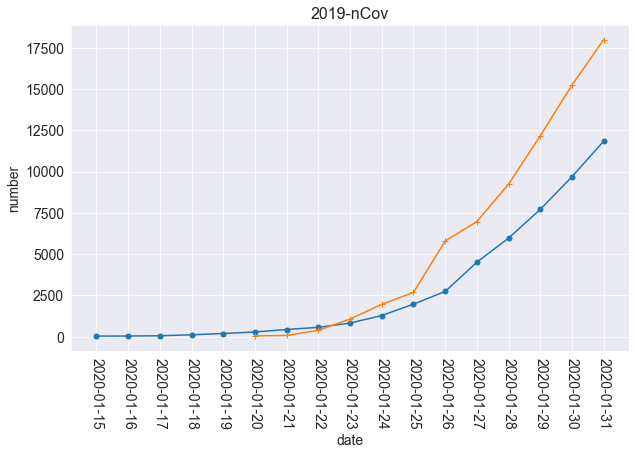

In [43]:
# visualize data 
import pylab as pl
plt.figure(figsize=(10, 6))
plt.plot(data.iloc[:,0],marker='o',markersize=5)
plt.plot(data.iloc[:,-1],marker='+',markersize=6)
plt.title('2019-nCov',fontsize=16)
plt.xlabel('date',fontsize=14)
plt.ylabel('number',fontsize=14)
pl.xticks(rotation=270)

In [44]:
# diagnosed - suspected ratio
I_S_ratio=data.iloc[:,0]/data.iloc[:,-1]
I_S_ratio

2020-01-15         NaN
2020-01-16         NaN
2020-01-17         NaN
2020-01-18         NaN
2020-01-19         NaN
2020-01-20     5.38889
2020-01-21         5.5
2020-01-22     1.45293
2020-01-23    0.774254
2020-01-24    0.654962
2020-01-25    0.735842
2020-01-26    0.473593
2020-01-27    0.647497
2020-01-28    0.646607
2020-01-29    0.633763
2020-01-30    0.635845
2020-01-31    0.658439
dtype: object

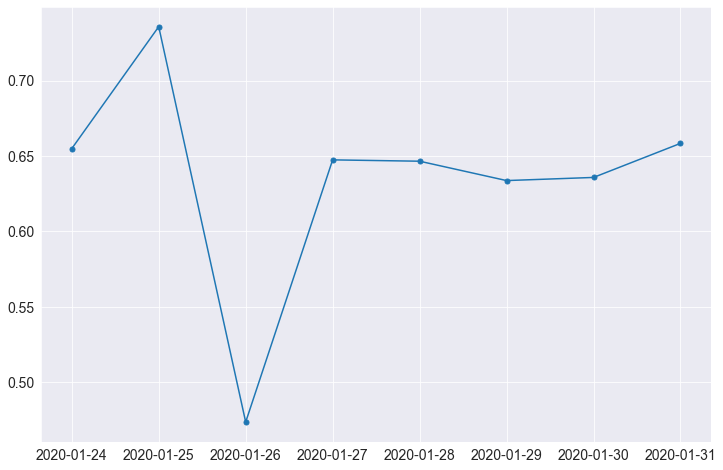

In [46]:
plt.plot(I_S_ratio[I_S_ratio.index>'2020-01-23'],marker='o',markersize=5)

In [48]:
# data construction
# data from 2020-01-01

In [60]:
date=['2020-01-0'+str(i) for i in range(1,10)]+['2020-01-'+str(i) for i in range(10,32)] # date: from 2020-01-01
I=[27]*9+[41]*6+[45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9689,11844]
R=[np.nan]*9+[2,6,7,7,7,12,15,19,24,25,25,25,25,34,38,49,51,60,103,124,175,247]
D=[np.nan]*9+[1,1,1,1,1,2,2,2,3,3,6,9,17,25,41,56,80,106,132,170,213,259] # death
S=[np.nan]*19+[54,80,393,1072,1965,2684,5794,6973,9239,12167,15238,17988]

In [61]:
data_new=pd.DataFrame([date,I,R,D,S]).T
data_new.columns=['date','确诊','治愈','死亡','疑似']

In [62]:
data_new.index=list(data_new.date)
data_new=data_new.iloc[:,1:]

In [64]:
data_new.to_hdf('data_new.h5',key='k')

In [68]:
# data_init
date=['2019-12-'+str(i) for i in range(12,32)]+['2020-01-0'+str(i) for i in range(1,10)]+['2020-01-'+str(i) for i in range(10,32)] # date: from 2020-01-01
I=[1]*20+[27]*9+[41]*6+[45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9689,11844]
R=[np.nan]*29+[2,6,7,7,7,12,15,19,24,25,25,25,25,34,38,49,51,60,103,124,175,247]
D=[np.nan]*29+[1,1,1,1,1,2,2,2,3,3,6,9,17,25,41,56,80,106,132,170,213,259] # death
S=[np.nan]*39+[54,80,393,1072,1965,2684,5794,6973,9239,12167,15238,17988] # 

In [69]:
data_init=pd.DataFrame([date,I,R,D,S]).T
data_init.columns=['date','确诊','治愈','死亡','疑似']
data_init.index=list(data_init.iloc[:,0])

In [71]:
data_init=data_init.iloc[:,1:]

In [73]:
data_init.to_hdf('data_init.h5',key='k')

#### 全国每日确诊,疑似,医学观察,累计医学观察数据
#### 分层抽样: 湖北省,广东省,重庆市,陕西省,甘肃省每日确诊,疑似,医学观察,累计医学观察数据
部分数据缺失

In [87]:
# construct detail data for selected province
date=['2020-01-'+str(i) for i in range(20,32)]+['2020-02-01']
    ##from 2020-01-20 to 2020-02-01 

In [106]:
# 湖北
I=[270,363,np.nan,np.nan,729,1052,1423,2714,3554,4586,5806,7153,9074]
S=[np.nan]*13
O=[np.nan]*5+[6904,9103,15559,20366,26632,32340,36838,43121] #医学观察 
O_all=[np.nan]*5+[7989,10394,16904,22059,28780,35144,41075,48571]
resource=['人民日报','人民日报',np.nan,np.nan,'人民日报','湖北卫健委','湖北卫健委','央视新闻',
         '湖北卫健委','人民日报','人民日报','人民日报','央视新闻']

In [107]:
hb_detail_data=pd.DataFrame([date,I,S,O,O_all,resource]).T
hb_detail_data.columns=['date','确诊','疑似','当日医学观察','累计医学观察','湖北_数据来源']
hb_detail_data.index=list(hb_detail_data.iloc[:,0])
hb_detail_data=hb_detail_data.iloc[:,1:]

In [108]:
hb_detail_data

,确诊,疑似,当日医学观察,累计医学观察,湖北_数据来源
2020-01-20,270,NaN,NaN,NaN,人民日报
2020-01-21,363,NaN,NaN,NaN,人民日报
2020-01-22,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN
2020-01-24,729,NaN,NaN,NaN,人民日报
2020-01-25,1052,NaN,6904,7989,湖北卫健委
2020-01-26,1423,NaN,9103,10394,湖北卫健委
2020-01-27,2714,NaN,15559,16904,央视新闻
2020-01-28,3554,NaN,20366,22059,湖北卫健委
2020-01-29,4586,NaN,26632,28780,人民日报


In [98]:
# 广东
I=[14,26,32,53,78,98,146,188,241,311,393,520,604]
S=[np.nan]*13
O=[np.nan]*3+[258,346,562,708,1019,1342,1286,1514,1965,2418]
O_all=[np.nan]*13
resource=['人民网']+[np.nan]*2+['广东卫健委']*6+['人民网']+['广东卫健委']*3

In [101]:
gd_detail_data=pd.DataFrame([date,I,S,O,O_all,resource]).T
gd_detail_data.columns=['date','确诊','疑似','当日医学观察','累计医学观察','广东_数据来源']
gd_detail_data.index=list(gd_detail_data.iloc[:,0])
gd_detail_data=gd_detail_data.iloc[:,1:]

In [102]:
gd_detail_data

,确诊,疑似,当日医学观察,累计医学观察,广东_数据来源
2020-01-20,14,NaN,NaN,NaN,人民网
2020-01-21,26,NaN,NaN,NaN,NaN
2020-01-22,32,NaN,NaN,NaN,NaN
2020-01-23,53,NaN,258,NaN,广东卫健委
2020-01-24,78,NaN,346,NaN,广东卫健委
2020-01-25,98,NaN,562,NaN,广东卫健委
2020-01-26,146,NaN,708,NaN,广东卫健委
2020-01-27,188,NaN,1019,NaN,广东卫健委
2020-01-28,241,NaN,1342,NaN,广东卫健委
2020-01-29,311,NaN,1286,NaN,人民网


In [103]:
# 重庆
I=[np.nan,6,9,27,57,75,110,132,147,165,206,238,262]
S=[np.nan]*13
O=[np.nan]*2+[94,224,404,793,1078,1445,2359,3363,3418,4789,5746]  
O_all=[np.nan]*2+[94,224,404,813,1106,1447,2462,3619,4125,5868,7327]
resource=[np.nan]*2+['重庆卫健委']*8+['央视新闻']*2+['人民网']*1

In [104]:
cq_detail_data=pd.DataFrame([date,I,S,O,O_all,resource]).T
cq_detail_data.columns=['date','确诊','疑似','当日医学观察','累计医学观察','重庆_数据来源']
cq_detail_data.index=list(cq_detail_data.iloc[:,0])
cq_detail_data=cq_detail_data.iloc[:,1:]

In [105]:
cq_detail_data

,确诊,疑似,当日医学观察,累计医学观察,重庆_数据来源
2020-01-20,NaN,NaN,NaN,NaN,NaN
2020-01-21,6,NaN,NaN,NaN,NaN
2020-01-22,9,NaN,94,94,重庆卫健委
2020-01-23,27,NaN,224,224,重庆卫健委
2020-01-24,57,NaN,404,404,重庆卫健委
2020-01-25,75,NaN,793,813,重庆卫健委
2020-01-26,110,NaN,1078,1106,重庆卫健委
2020-01-27,132,NaN,1445,1447,重庆卫健委
2020-01-28,147,NaN,2359,2462,重庆卫健委
2020-01-29,165,NaN,3363,3619,重庆卫健委


In [118]:
# 陕西
I=[0,0,3,5,15,22,35,46,56,63,87,101,110]
S=[np.nan]*10+[132,158,201]
O=[0,0,53,125,179,273,559,899,1288,1979,2779,3564,4394]  
O_all=[np.nan]*13
resource=[np.nan]*2+['陕西卫健委','人民日报',np.nan]+['人民日报']*4+['陕西卫健委']*4

In [119]:
sx_detail_data=pd.DataFrame([date,I,S,O,O_all,resource]).T
sx_detail_data.columns=['date','确诊','疑似','当日医学观察','累计医学观察','陕西_数据来源']
sx_detail_data.index=list(sx_detail_data.iloc[:,0])
sx_detail_data=sx_detail_data.iloc[:,1:]

In [120]:
sx_detail_data

,确诊,疑似,当日医学观察,累计医学观察,陕西_数据来源
2020-01-20,0,NaN,0,NaN,NaN
2020-01-21,0,NaN,0,NaN,NaN
2020-01-22,3,NaN,53,NaN,陕西卫健委
2020-01-23,5,NaN,125,NaN,人民日报
2020-01-24,15,NaN,179,NaN,NaN
2020-01-25,22,NaN,273,NaN,人民日报
2020-01-26,35,NaN,559,NaN,人民日报
2020-01-27,46,NaN,899,NaN,人民日报
2020-01-28,56,NaN,1288,NaN,人民日报
2020-01-29,63,NaN,1979,NaN,陕西卫健委


In [115]:
# 甘肃
I=[0,0,0,2,4,7,14,19,24,26,29,35,40]
S=[np.nan]*13
O=[np.nan]*5+[83,199,277,388,556,654,886,1046]  
O_all=[np.nan]*5+[83,199,279,396,566,700,931,1125]
resource=[np.nan]*3+['人民网']*2+['甘肃卫健委']*2+['人民日报']*6

In [116]:
gs_detail_data=pd.DataFrame([date,I,S,O,O_all,resource]).T
gs_detail_data.columns=['date','确诊','疑似','当日医学观察','累计医学观察','甘肃_数据来源']
gs_detail_data.index=list(gs_detail_data.iloc[:,0])
gs_detail_data=gs_detail_data.iloc[:,1:]

In [117]:
gs_detail_data

,确诊,疑似,当日医学观察,累计医学观察,甘肃_数据来源
2020-01-20,0,NaN,NaN,NaN,NaN
2020-01-21,0,NaN,NaN,NaN,NaN
2020-01-22,0,NaN,NaN,NaN,NaN
2020-01-23,2,NaN,NaN,NaN,人民网
2020-01-24,4,NaN,NaN,NaN,人民网
2020-01-25,7,NaN,83,83,甘肃卫健委
2020-01-26,14,NaN,199,199,甘肃卫健委
2020-01-27,19,NaN,277,279,人民日报
2020-01-28,24,NaN,388,396,人民日报
2020-01-29,26,NaN,556,566,人民日报


In [127]:
# 全国
I=[np.nan,440,473,830,1287,1975,2744,4515,5974,7711,9692,11791,14380]
S=[np.nan]*3+[1072,1965,2684,5794,6973,9239,12167,15238,17988,19544]
O=[np.nan]+[922,1394,4928,13967,21556,30453,44132,59990,81947,102447,118478,137594]  
O_all=[np.nan]+[1739,2197,5897,15197,23431,32799,47833,65537,88693,113579,136987,163844]
resource=[np.nan]+['国家卫健委']*12

In [128]:
china_detail_data=pd.DataFrame([date,I,S,O,O_all,resource]).T
china_detail_data.columns=['date','确诊','疑似','当日医学观察','累计医学观察','全国数据来源']
china_detail_data.index=list(china_detail_data.iloc[:,0])
china_detail_data=china_detail_data.iloc[:,1:]

In [129]:
china_detail_data

,确诊,疑似,当日医学观察,累计医学观察,全国数据来源
2020-01-20,NaN,NaN,NaN,NaN,NaN
2020-01-21,440,NaN,922,1739,国家卫健委
2020-01-22,473,NaN,1394,2197,国家卫健委
2020-01-23,830,1072,4928,5897,国家卫健委
2020-01-24,1287,1965,13967,15197,国家卫健委
2020-01-25,1975,2684,21556,23431,国家卫健委
2020-01-26,2744,5794,30453,32799,国家卫健委
2020-01-27,4515,6973,44132,47833,国家卫健委
2020-01-28,5974,9239,59990,65537,国家卫健委
2020-01-29,7711,12167,81947,88693,国家卫健委


In [130]:
detail_data_store=pd.HDFStore('detail_data_store.h5')
# detail_data_store is a hdfstore datastructure

In [131]:
detail_data_store.root

/ (RootGroup) ''
  children := []

In [132]:
detail_data_store['china_detail_data']=china_detail_data
detail_data_store['gs_detail_data']=gs_detail_data
detail_data_store['sx_detail_data']=sx_detail_data
detail_data_store['cq_detail_data']=cq_detail_data
detail_data_store['gd_detail_data']=gd_detail_data
detail_data_store['hb_detail_data']=hb_detail_data

In [137]:
detail_data_store.close()